<a href="https://colab.research.google.com/github/Voztok94/Homework6/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jason Carpenter
Homework 6
Description: create a top-20 word frequency bar chart and a word cloud for Shakespeare's Hamlet.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from wordcloud import WordCloud
import requests
from textblob import TextBlob
import imageio
import nltk
from nltk.corpus import stopwords
from operator import itemgetter
import pandas as pd

In [2]:
# Fetch the Hamlet text data
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Process text with TextBlob
blob = TextBlob(data)

# Fetch the image for the mask
image_file = 'https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png'
mask_image = imageio.imread(image_file)
mask_array = np.array(mask_image)

<ipython-input-2-07ebeeac2990>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


In [4]:
# Download NLTK stopwords and prepare stopword list
nltk.download('punkt')
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Filter out stopwords from the blob word counts
items = blob.word_counts.items()
items = [item for item in items if item[0].lower() not in stop_words]

# Sort words by frequency and pick top 20
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


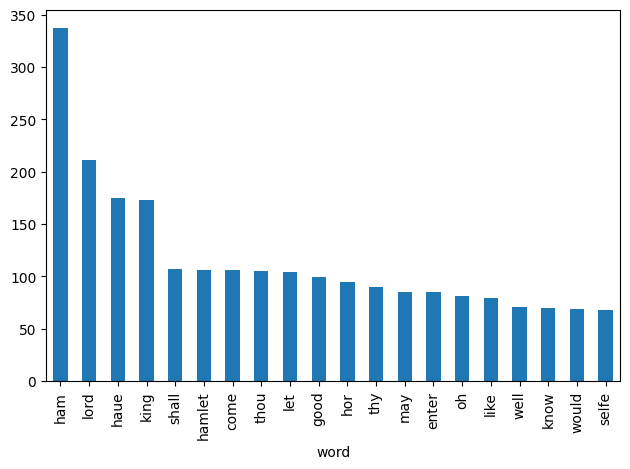

In [5]:
# Create a DataFrame and plot
df = pd.DataFrame(top20, columns=['word', 'count'])
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

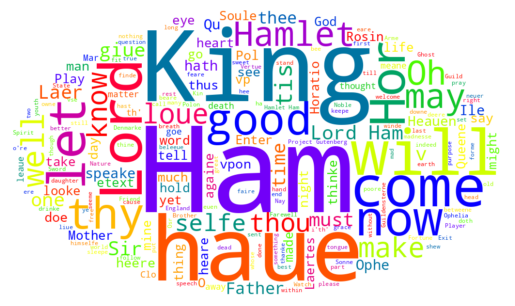

In [6]:
# Generate and display the word cloud
wordcloud = WordCloud(colormap='prism', mask=mask_array, background_color='white')

wordcloud.generate(data)  # Generate word cloud from text

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save word cloud to a file
wordcloud.to_file('wordcloud.png')
